In [48]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BOOKS_PATH = "books.json"

with open(BOOKS_PATH, "r", encoding="utf-8") as f:
    books = json.load(f)

df = pd.DataFrame(books)
df.head()

,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,available
0,cb57fd35-270d-4a58-93af-192733865f26,Book Title 1,Author 9,Fantasy,1993,543,3.51,122,12.43,Atlas Publishing,English,Ebook,True,5.67,True
1,b9cfacfa-2142-456d-a21c-64ab1d7b8321,Book Title 2,Author 70,Romance,1985,985,2.12,37,5.59,Blue River Books,English,Paperback,True,4.42,True
2,a023acd7-7780-4ab7-8224-b99a0fb93a81,Book Title 3,Author 52,Mystery,1978,266,3.14,93,11.51,North Star Press,English,Audiobook,True,4.28,False
3,8c31692e-fd8d-4d97-a46d-96cc95681d12,Book Title 4,Author 68,Fantasy,1980,838,2.75,104,7.04,North Star Press,English,Paperback,True,5.48,True
4,c20423cb-ccf1-4481-bf4e-2ad6515ed29b,Book Title 5,Author 75,Technology,2010,165,3.14,88,5.80,Emerald House,English,Hardcover,True,6.78,True


In [ ]:
def normalize_str(x):
    if x is None:
        return np.nan
    if isinstance(x, str):
        s = x.strip()
        return s if s else np.nan
    return x


df.replace(["Unknown", "N/A" ,""], np.nan, inplace=True)

# String columns
for col in ["title", "author", "genre", "publisher", "language", "format"]:
    df[col] = df[col].apply(normalize_str)

# Normalize language
df["language"] = df["language"].replace(
    {"english": "English", "Eng": "English"}
)
# Format
df["format"] = df["format"].replace(
    {"Audio Book": "Audiobook"}
)

# Numeric columns
df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce")
df.loc[
    (df["publication_year"] < 1400) | (df["publication_year"] > 2025),
    "publication_year"
] = np.nan

# invalid page counts
df["page_count"] = pd.to_numeric(df["page_count"], errors="coerce")
df = df[df["page_count"] > 0] 

df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df.loc[
    (df["average_rating"] < 0) | (df["average_rating"] > 5),
    "average_rating"
] = np.nan

df["ratings_count"] = pd.to_numeric(df["ratings_count"], errors="coerce")
df.loc[df["ratings_count"] < 0, "ratings_count"] = np.nan

df["price_usd"] = pd.to_numeric(df["price_usd"], errors="coerce")
df.loc[df["price_usd"] < 0, "price_usd"] = np.nan

df["sales_millions"] = pd.to_numeric(df["sales_millions"], errors="coerce")
df.loc[df["sales_millions"] < 0, "sales_millions"] = np.nan


df = df[df["language"] == "English"].copy()

df.reset_index(drop=True, inplace=True)
df.head(10)

,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,available
0,cb57fd35-270d-4a58-93af-192733865f26,Book Title 1,Author 9,Fantasy,1993.0,543,3.51,122.0,12.43,Atlas Publishing,English,Ebook,True,5.67,True
1,b9cfacfa-2142-456d-a21c-64ab1d7b8321,Book Title 2,Author 70,Romance,1985.0,985,2.12,37.0,5.59,Blue River Books,English,Paperback,True,4.42,True
2,a023acd7-7780-4ab7-8224-b99a0fb93a81,Book Title 3,Author 52,Mystery,1978.0,266,3.14,93.0,11.51,North Star Press,English,Audiobook,True,4.28,False
3,8c31692e-fd8d-4d97-a46d-96cc95681d12,Book Title 4,Author 68,Fantasy,1980.0,838,2.75,104.0,7.04,North Star Press,English,Paperback,True,5.48,True
4,c20423cb-ccf1-4481-bf4e-2ad6515ed29b,Book Title 5,Author 75,Technology,2010.0,165,3.14,88.0,5.80,Emerald House,English,Hardcover,True,6.78,True
5,07aba9ff-6429-483e-99c5-dcfb5deb8eb4,Book Title 6,Author 42,Sci-Fi,1954.0,216,3.03,67.0,5.32,Atlas Publishing,English,Ebook,True,6.89,False
6,bc714f25-65c7-41ab-8643-bb8dc5a0db9c,Book Title 7,Author 56,Fantasy,2007.0,989,3.21,77.0,7.38,Atlas Publishing,English,Hardcover,True,6.92,True
7,9668f115-c299-46bd-9390-b850631cfe19,Book Title 8,Author 35,Sci-Fi,1968.0,457,3.51,118.0,14.60,Emerald House,English,Paperback,True,9.03,True
8,bcf69e8c-b9cf-4e90-bd7a-9fb68e43e014,Book Title 9,Author 28,Fantasy,2014.0,587,2.14,64.0,3.99,Atlas Publishing,English,Hardcover,True,4.59,True
9,6f3b9def-8887-4798-b47c-d085691593c9,Book Title 10,Author 56,History,2008.0,846,3.26,133.0,10.14,Emerald House,English,Paperback,False,4.53,False


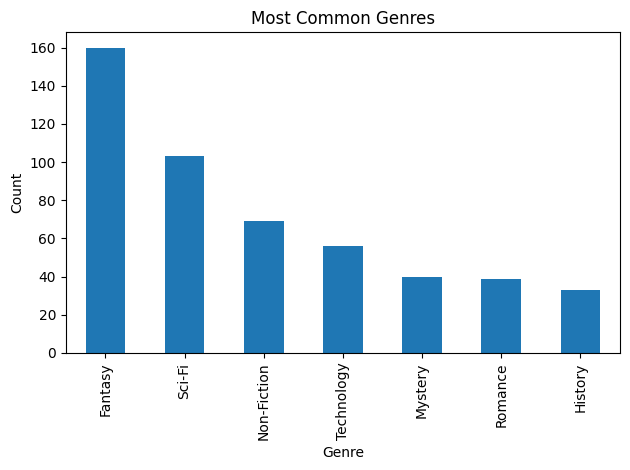

In [50]:
genre_counts = df["genre"].value_counts().sort_values(ascending=False)

plt.figure()
genre_counts.plot(kind="bar")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

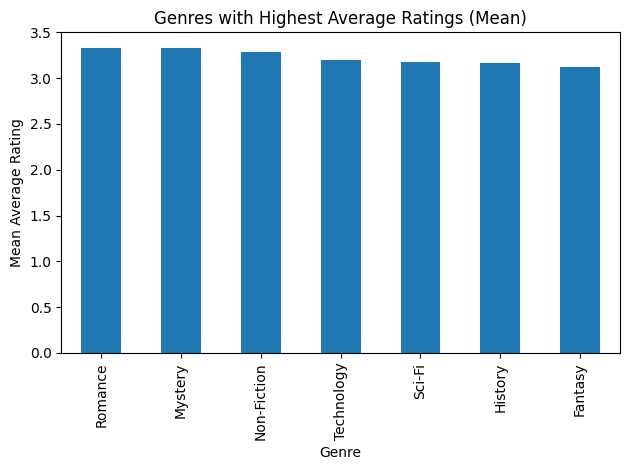

In [ ]:
genre_mean_rating = (
    df.dropna(subset=["average_rating"])
    .groupby("genre")["average_rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
genre_mean_rating.plot(kind="bar")
plt.title("Genres with Highest Average Ratings")
plt.xlabel("Genre")
plt.ylabel("Mean Average Rating")
plt.tight_layout()
plt.show()

Bayesian weighted rating by genre (descending):
             weighted_rating  mean_average_rating  median_ratings_count  \
genre                                                                     
Romance             3.288452             3.333590                 118.0   
Mystery             3.278558             3.330000                  92.0   
Non-Fiction         3.258214             3.290435                 109.0   
Technology          3.197716             3.196429                  91.5   
Sci-Fi              3.185092             3.175146                  88.0   
History             3.177940             3.165152                 102.0   
Fantasy             3.151713             3.119375                  89.0   

             n_books  
genre                 
Romance           39  
Mystery           40  
Non-Fiction       69  
Technology        56  
Sci-Fi           103  
History           33  
Fantasy          160  


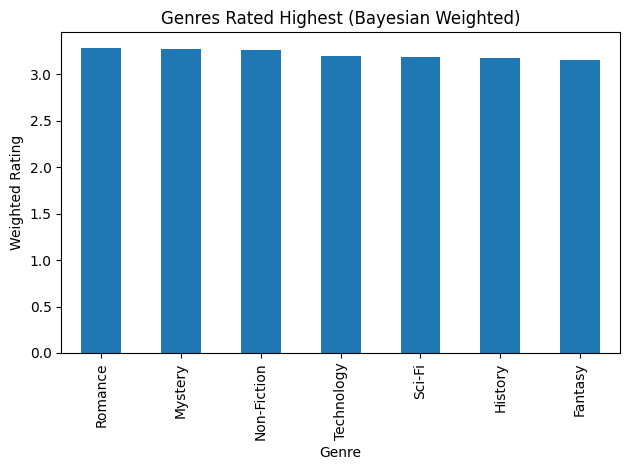

In [ ]:
m = 60 
C = df["average_rating"].dropna().mean()

genre_stats = (
    df.dropna(subset=["average_rating", "ratings_count"])
    .groupby("genre")
    .agg(
        mean_average_rating=("average_rating", "mean"),
        median_ratings_count=("ratings_count", "median"),
        n_books=("book_id", "count") if "book_id" in df_clean.columns else ("genre", "count"),
    )
)

v = genre_stats["median_ratings_count"]
R = genre_stats["mean_average_rating"]

genre_stats["weighted_rating"] = (v / (v + m)) * R + (m / (v + m)) * C
genre_stats_sorted = genre_stats.sort_values("weighted_rating", ascending=False)

print("Bayesian weighted rating by genre (descending):")
print(genre_stats_sorted[["weighted_rating", "mean_average_rating", "median_ratings_count", "n_books"]])

plt.figure()
genre_stats_sorted["weighted_rating"].plot(kind="bar")
plt.title(f"Genres Rated Highest (Bayesian Weighted)")
plt.xlabel("Genre")
plt.ylabel("Weighted Rating")
plt.tight_layout()
plt.show()

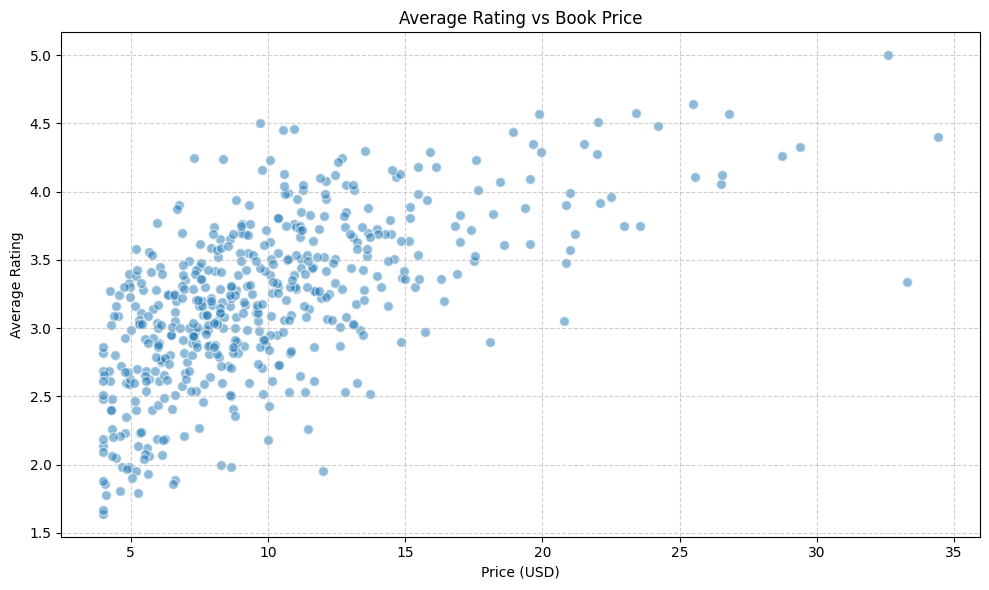

In [53]:
import matplotlib.pyplot as plt

df_scatter = df.copy()

plt.figure(figsize=(10, 6))
plt.scatter(
    df_scatter["price_usd"],
    df_scatter["average_rating"],
    alpha=0.5,
    edgecolors="white",
    s=50
)

plt.title("Average Rating vs Book Price")
plt.xlabel("Price (USD)")
plt.ylabel("Average Rating")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()